[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/danielegrattarola/ml-18-19/blob/master/05_unsupervised_learning.ipynb)

# Machine Learning

Prof. Cesare Alippi  
Daniele Grattarola  ([`daniele.grattarola@usi.ch`](mailto:daniele.grattarola@usi.ch)  )    
Daniele Zambon ([`daniele.zambon@usi.ch`](mailto:daniele.zambon@usi.ch)  )

---
# Lab 05: Unsupervised learning

## Example: Iris dataset

In [1]:
from sklearn import datasets

# load the data
iris = datasets.load_iris()

### Let's get a sense of the data set:

* See [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [4]:
# list the keys
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
# read the keys
print('DESCR', iris['DESCR'])
print('feature_names', iris['feature_names'])
print('target_names', iris['target_names'])
print('data', iris['data'][:10])
print('target', iris['target'])

# extract data
X = iris.data
y = iris.target  # only for colouring!

DESCR .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== =====

### Explore the data

#### First of all: shapes!

In [6]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

(n, d) = X.shape
print('d:', d)
print('n:', n)

Shape of X: (150, 4)
Shape of y: (150,)
d: 4
n: 150


#### Histograms


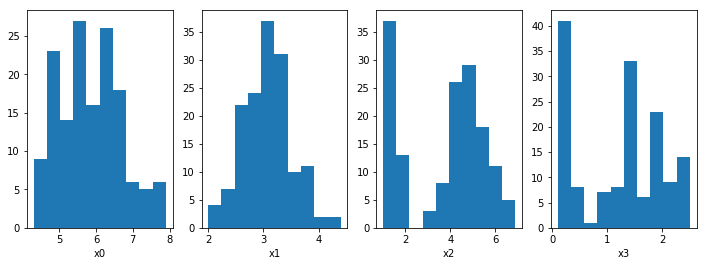

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
for i in range(d):
    plt.subplot(1, d, i+1)
    plt.hist(X[:, i])
    plt.xlabel('x{}'.format(i))

#### Scatter plots 
We have 4 features: 
* at most we can visualise 3D
* (Personal opinion!) 2D plots are clearer than 3D ones


Text(0.5,0,'x_3')

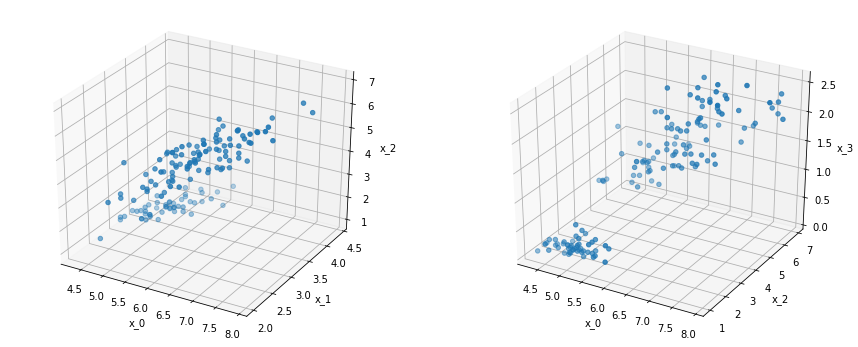

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(121, projection='3d')  #, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])  #, c=y)
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('x_2')

# x0, x2, x3
ax = fig.add_subplot(122, projection='3d')  #, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 2], X[:, 3])  #, c=y)
ax.set_xlabel('x_0')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')

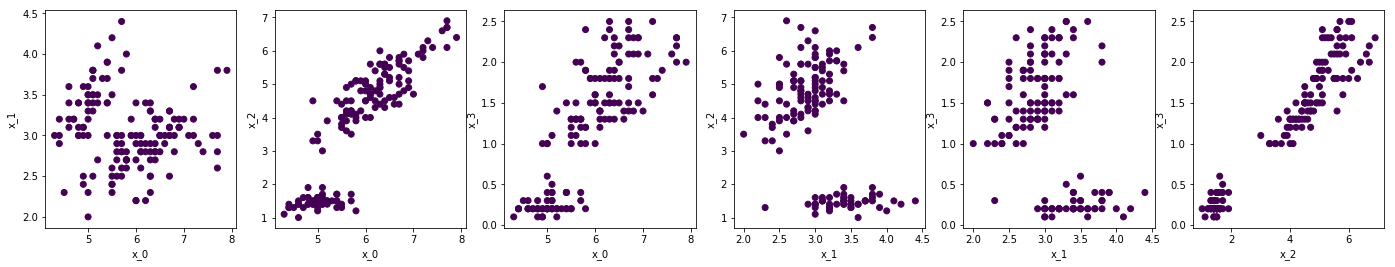

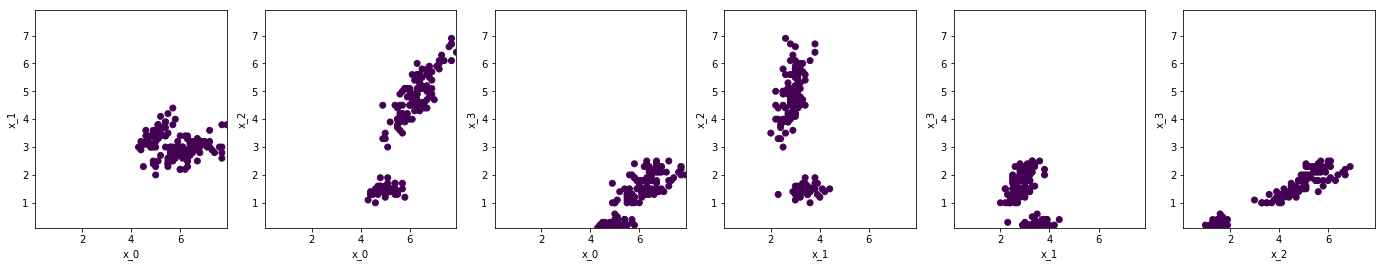

In [22]:
def plot_every_pair(X, colors=None, same_axis=False):
    d = X.shape[1]
    if colors is None:
        colors = np.zeros(X.shape[0])
    n_plots = d*(d-1)//2
    plt.figure(figsize=(4 * n_plots, 4))
    ct = 0 
    for i in range(1, d+1):
        for j in range(i+1, d+1):
            ct += 1
            plt.subplot(1, n_plots, ct)
            plt.scatter(X[:, i-1], X[:, j-1], c=colors)
            plt.xlabel('x_{}'.format(i-1))
            plt.ylabel('x_{}'.format(j-1))
            if same_axis:
                # Use same axis scaling
                plt.xlim([X.min(), X.max()])
                plt.ylim([X.min(), X.max()])

plot_every_pair(X, same_axis=False)
plot_every_pair(X, same_axis=True)
                

### Principal Component Analysis

* Subtract the mean
* (should we rescale?)
* Compute the matrix $\Sigma = X^\top X$
* Eigen-decomposition $ U \Lambda U^\top = \Sigma$ 

**Remark 1:** Recall eigenvalues and eigenvectors: $\Sigma \vec u = \lambda \vec u$

Now apply the transformation
1. Lossless rotation $U^\top \vec x$ to each vector.
2. Lossy transformation:
    - Discard some eigen-vectors $\tilde U\leftarrow U$
    - apply transformation $\tilde U^\top \vec x$ to each vector.

**Remark 2:** To transform the entire dataset, simply do $XU$ or $X\tilde U$.



(4,) (4, 4)


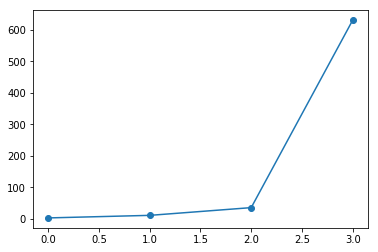

In [23]:
X = X - np.mean(X, axis=0)

Sigma = (X.T).dot(X)
lam, U = np.linalg.eigh(Sigma)

print(lam.shape, U.shape)
plt.figure()
plt.plot(lam, 'o-')

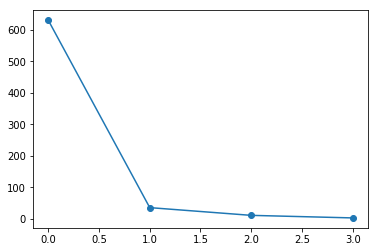

In [24]:
# Sort the eigenvalues
lam = lam[::-1]
U = U[:, ::-1]
plt.figure()
plt.plot(lam, 'o-')

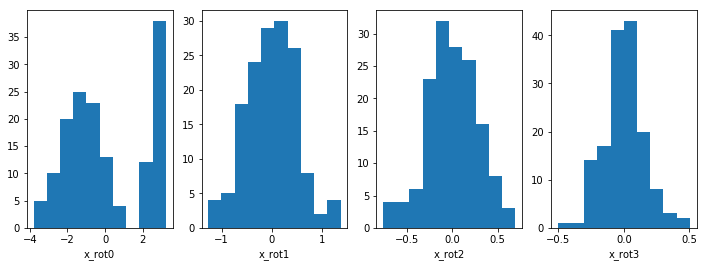

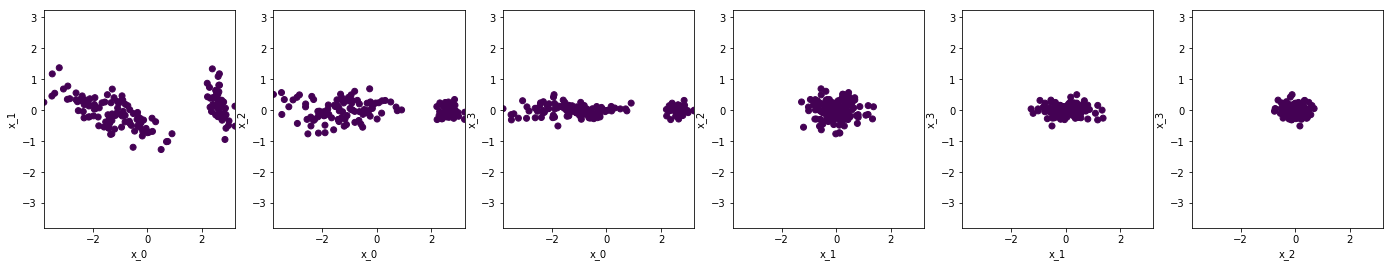

In [25]:
# Apply rotation
X_rot = X.dot(U)

plt.figure(figsize=(12, 4))
for i in range(d):
    plt.subplot(1, d, i+1)
    plt.hist(X_rot[:, i])
    plt.xlabel('x_rot{}'.format(i))

plot_every_pair(X_rot, same_axis=True)

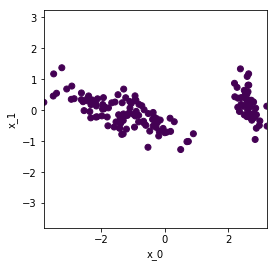

In [27]:
# Apply reduced transformation
l = 2  # columns to discard
Utilde = U[:, :d-l]
X_red = X.dot(Utilde)
# Equivalente to X_red = X_rot[:, :d-l]

plot_every_pair(X_red, same_axis=True)

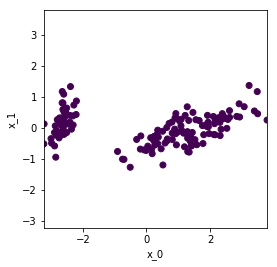

In [28]:
# PCA with sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=d-l)
pca.fit(X)
X1_red = pca.transform(X)
plot_every_pair(X1_red, same_axis=True)

### Performance degradation in classification

In [39]:
from sklearn.neighbors import KNeighborsClassifier

k = 3

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X, y) 
y_pred = neigh.predict(X)
accuracy_train = np.sum(y_pred == y) / n 
print('original {0:.3f}%'.format(100*accuracy_train))

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_rot, y) 
y_pred = neigh.predict(X_rot)
accuracy_train = np.sum(y_pred == y) / n 
print('rotated {0:.3f}%'.format(100*accuracy_train))

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_red, y) 
y_pred = neigh.predict(X_red)
accuracy_train = np.sum(y_pred == y) / n 
print('reduced {0:.3f}%'.format(100*accuracy_train))

original 96.000%
rotated 96.000%
reduced 99.333%


# Clustering: k-means
[https://scikit-learn.org/stable/modules/clustering.html
](https://scikit-learn.org/stable/modules/clustering.html)

Text(0.5,1,'true classes')

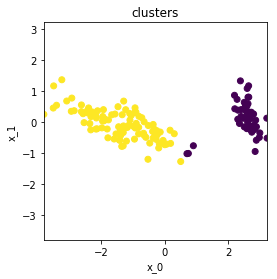

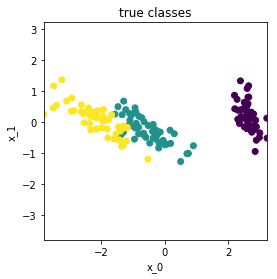

In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering

k_clusters = 2

k_means = KMeans(n_clusters=k_clusters)
# dist, lab, val = k_means.fit(X).predict(X)
lab = k_means.fit_predict(X)

plot_every_pair(X_red, lab, same_axis=True)
plt.title('clusters')

plot_every_pair(X_red, y, same_axis=True)
plt.title('true classes')

### Optimal number of clusters

Text(0.5,0,'x_2')

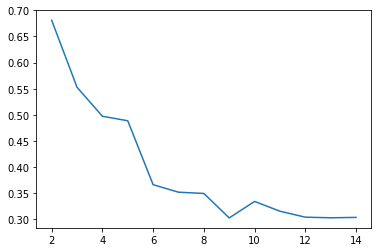

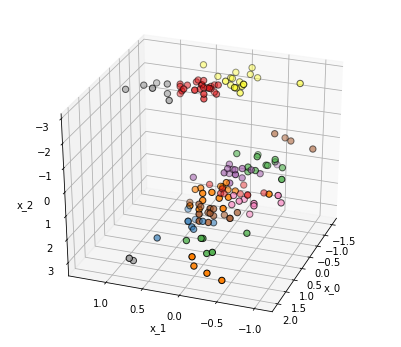

In [40]:
from sklearn.metrics import silhouette_score

XX = X  #np.concatenate((X, X-4, X+4), axis=0)

k_list = range(2, 15)
scores = []
for k in k_list:
    k_means = KMeans(n_clusters=k)
    lab = k_means.fit_predict(XX)
    sc = silhouette_score(XX, lab)
    scores.append(sc)
    

plt.plot(k_list, scores)

# x0, x1, x2
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(121, projection='3d', elev=-150, azim=160)
ax.scatter(XX[:, 0], XX[:, 1], XX[:, 2], c=lab, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('x_2')